In [1]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torch import Tensor
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn import Linear, ReLU, Softmax, Module, CrossEntropyLoss
from torch.nn.init import kaiming_uniform_, xavier_uniform_

In [2]:
arr = [[3, 4], [8, 5]]
arr0 = [1, 2, 3, 4]
arr1 = np.random.randint(1, 10, (3,3))
pyTensor = torch.Tensor(arr0)
pyTensor1 = torch.Tensor(arr1)
mean = pyTensor.mean(dim=0)

print(pyTensor)
print(pyTensor1)
print(pyTensor.size())
print(pyTensor1.view(9))
print(mean)
print(pyTensor.dtype)
print(pyTensor[0:2])
print(pyTensor.view(2,2))

tensor([1., 2., 3., 4.])
tensor([[3., 7., 3.],
        [8., 5., 5.],
        [8., 1., 6.]])
torch.Size([4])
tensor([3., 7., 3., 8., 5., 5., 8., 1., 6.])
tensor(2.5000)
torch.float32
tensor([1., 2.])
tensor([[1., 2.],
        [3., 4.]])


In [3]:
x = Variable(torch.ones(1), requires_grad=True)
y = 5 * (x + 1) ** 2
y.backward()
print(torch.ones(1))
print(x.grad)

tensor([1.])
tensor([20.])


In [4]:
arr = torch.Tensor([3, 4, 8, 5])
arr0 = torch.Tensor([1, 2, 3, 4])
print(arr+arr0)
print(arr*arr0)

t1= torch.tensor([1,2,3])  
t2= torch.tensor([4,5,6])  
t3 = torch.dot(t1, t2)
print(t3)

x = torch.linspace(1,10,100)
y = torch.exp(x)

#plt.plot(x, y)
#plt.show()

tensor([ 4.,  6., 11.,  9.])
tensor([ 3.,  8., 24., 20.])
tensor(32)


## Linear Reg.

LRM(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
epoch 0 - loss 67.7297134399414 
epoch 1 - loss 59.50936508178711 
epoch 2 - loss 52.43878936767578 
epoch 3 - loss 46.35721206665039 
epoch 4 - loss 41.12623596191406 
epoch 5 - loss 36.62691116333008 
epoch 6 - loss 32.75690841674805 
epoch 7 - loss 29.428207397460938 
epoch 8 - loss 26.565107345581055 
epoch 9 - loss 24.102439880371094 
epoch 10 - loss 21.984216690063477 
epoch 11 - loss 20.162273406982422 
epoch 12 - loss 18.59518051147461 
epoch 13 - loss 17.247268676757812 
epoch 14 - loss 16.0878849029541 
epoch 15 - loss 15.090659141540527 
epoch 16 - loss 14.232918739318848 
epoch 17 - loss 13.495136260986328 
epoch 18 - loss 12.86054801940918 
epoch 19 - loss 12.314718246459961 
epoch 20 - loss 11.845231056213379 
epoch 21 - loss 11.441407203674316 
epoch 22 - loss 11.094062805175781 
epoch 23 - loss 10.795296669006348 
epoch 24 - loss 10.53831672668457 
epoch 25 - loss 10.317277908325195 
epoch 26 - loss 10.

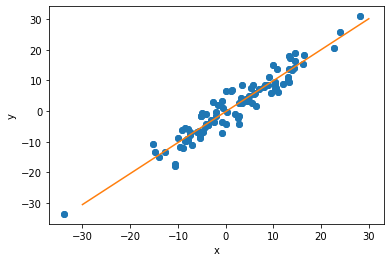

In [5]:
xdata = torch.randn(100,1)*10  
ydata = xdata + 3*torch.randn(100,1)
plt.plot(xdata.numpy(), ydata.numpy(),'o')  
plt.ylabel('y')  
plt.xlabel('x') 

class LRM(torch.nn.Module):
    def __init__(self):
        super(LRM, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    
    def forward(self, x):
        ypred = self.linear(x)
        return ypred

torch.manual_seed(2) 
ourmodel = LRM() 
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(ourmodel.parameters(), lr=0.01)
print(ourmodel)  
[a,b] = ourmodel.parameters()
losses=[]  
for epoch in range(100):
    predy = ourmodel.forward(xdata)
    loss = criterion(predy, ydata)
    losses.append(loss)  
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()
    print(f'epoch {epoch} - loss {loss.item()} ')

newvar = Variable(torch.Tensor([[4.0]]))  
predy = ourmodel(newvar)  
print("predict (after training)", 4, ourmodel(newvar).data[0][0])

def grtparameters():
    return(a[0][0].item(),b[0].item())

a1,b1=grtparameters()
x1=np.array([-30,30]) 
y1=a1*x1+b1
plt.plot(x1,y1)
plt.scatter(xdata,ydata)
plt.show()

[Parameter containing:
tensor([[ 0.1939, -0.0361]], requires_grad=True), Parameter containing:
tensor([0.3021], requires_grad=True)]
0.19390898942947388 -0.036117494106292725 0.3020673394203186
epoch 0 - loss 0.6495164632797241 
epoch 1 - loss 0.644089937210083 
epoch 2 - loss 0.638718843460083 
epoch 3 - loss 0.6334041953086853 
epoch 4 - loss 0.6281468868255615 
epoch 5 - loss 0.6229477524757385 
epoch 6 - loss 0.6178076267242432 
epoch 7 - loss 0.6127272248268127 
epoch 8 - loss 0.6077070236206055 
epoch 9 - loss 0.6027476787567139 
epoch 10 - loss 0.5978496074676514 
epoch 11 - loss 0.5930130481719971 
epoch 12 - loss 0.5882384777069092 
epoch 13 - loss 0.5835258364677429 
epoch 14 - loss 0.5788753628730774 
epoch 15 - loss 0.574286937713623 
epoch 16 - loss 0.5697605013847351 
epoch 17 - loss 0.5652956962585449 
epoch 18 - loss 0.5608923435211182 
epoch 19 - loss 0.5565500855445862 
epoch 20 - loss 0.5522682666778564 
epoch 21 - loss 0.5480465292930603 
epoch 22 - loss 0.543884098

epoch 220 - loss 0.2175220102071762 
epoch 221 - loss 0.21691013872623444 
epoch 222 - loss 0.21630221605300903 
epoch 223 - loss 0.2156982421875 
epoch 224 - loss 0.21509818732738495 
epoch 225 - loss 0.2145019918680191 
epoch 226 - loss 0.21390961110591888 
epoch 227 - loss 0.2133210003376007 
epoch 228 - loss 0.21273618936538696 
epoch 229 - loss 0.21215511858463287 
epoch 230 - loss 0.2115776687860489 
epoch 231 - loss 0.2110038697719574 
epoch 232 - loss 0.2104337364435196 
epoch 233 - loss 0.20986714959144592 
epoch 234 - loss 0.2093041092157364 
epoch 235 - loss 0.2087445855140686 
epoch 236 - loss 0.2081885188817978 
epoch 237 - loss 0.20763589441776276 
epoch 238 - loss 0.2070866972208023 
epoch 239 - loss 0.20654088258743286 
epoch 240 - loss 0.20599840581417084 
epoch 241 - loss 0.20545926690101624 
epoch 242 - loss 0.20492340624332428 
epoch 243 - loss 0.2043907791376114 
epoch 244 - loss 0.20386138558387756 
epoch 245 - loss 0.2033352106809616 
epoch 246 - loss 0.202812239

epoch 497 - loss 0.12768606841564178 
epoch 498 - loss 0.12751220166683197 
epoch 499 - loss 0.12733887135982513 
epoch 500 - loss 0.12716612219810486 
epoch 501 - loss 0.12699390947818756 
epoch 502 - loss 0.12682221829891205 
epoch 503 - loss 0.1266511082649231 
epoch 504 - loss 0.1264805644750595 
epoch 505 - loss 0.12631049752235413 
epoch 506 - loss 0.1261410117149353 
epoch 507 - loss 0.12597204744815826 
epoch 508 - loss 0.12580366432666779 
epoch 509 - loss 0.1256357729434967 
epoch 510 - loss 0.1254684031009674 
epoch 511 - loss 0.1253015697002411 
epoch 512 - loss 0.12513525784015656 
epoch 513 - loss 0.124969482421875 
epoch 514 - loss 0.12480421364307404 
epoch 515 - loss 0.12463944405317307 
epoch 516 - loss 0.12447519600391388 
epoch 517 - loss 0.12431146949529648 
epoch 518 - loss 0.12414824217557907 
epoch 519 - loss 0.12398552149534225 
epoch 520 - loss 0.12382330000400543 
epoch 521 - loss 0.1236615851521492 
epoch 522 - loss 0.12350036948919296 
epoch 523 - loss 0.12

epoch 777 - loss 0.09379605203866959 
epoch 778 - loss 0.09371107816696167 
epoch 779 - loss 0.09362626820802689 
epoch 780 - loss 0.09354164451360703 
epoch 781 - loss 0.0934571847319603 
epoch 782 - loss 0.0933728963136673 
epoch 783 - loss 0.09328878670930862 
epoch 784 - loss 0.09320484846830368 
epoch 785 - loss 0.09312107414007187 
epoch 786 - loss 0.09303746372461319 
epoch 787 - loss 0.09295403212308884 
epoch 788 - loss 0.09287077188491821 
epoch 789 - loss 0.09278767555952072 
epoch 790 - loss 0.09270475059747696 
epoch 791 - loss 0.09262198209762573 
epoch 792 - loss 0.09253938496112823 
epoch 793 - loss 0.09245695918798447 
epoch 794 - loss 0.09237470477819443 
epoch 795 - loss 0.09229260683059692 
epoch 796 - loss 0.09221069514751434 
epoch 797 - loss 0.09212889522314072 
epoch 798 - loss 0.0920473039150238 
epoch 799 - loss 0.09196584671735764 
epoch 800 - loss 0.09188457578420639 
epoch 801 - loss 0.09180346131324768 
epoch 802 - loss 0.0917225182056427 
epoch 803 - loss

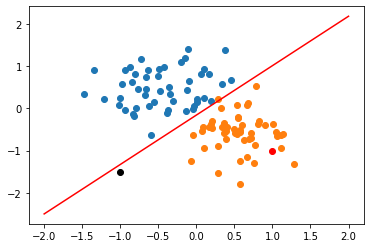

Red point positive probability=0.9995266199111938
Black point positive probability=0.6588972210884094
Red point in calss=1
Black point in calss=1


In [6]:
from sklearn import datasets 

no_of_points=100  
centers=[[-0.5,0.5],[0.5,-0.5]]
x,y=datasets.make_blobs(n_samples=no_of_points,random_state=123,centers=centers, cluster_std=0.4)  

def Scatter():
    plt.scatter(x[y==0,0],x[y==0,1])
    plt.scatter(x[y==1,0],x[y==1,1])

class Perceptron_model(torch.nn.Module):
    def __init__(self,input_size,output_size):
        super().__init__()
        self.linear=torch.nn.Linear(input_size,output_size) 
        
    def forward(self,x):
        pred=torch.sigmoid(self.linear(x))
        return pred
    
    def predict(self,x):
        pred=torch.sigmoid(self.linear(x))  
        if pred>=0.5:
            return 1
        else:
            return 0
    
xdata=torch.Tensor(x)  
ydata=torch.Tensor(y.reshape(100,1))

model= Perceptron_model(2,1)
print(list(model.parameters()))

torch.manual_seed(2)  
[A,B] = model.parameters()  
A1,A2 = A.view(2)  
B1 = B[0]  
print(A1.item(), A2.item(),B1.item())

#train
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs=1000
losses=[]
for i in range(epochs):
    ypred = model.forward(xdata)
    loss = criterion(ypred, ydata)
    print(f'epoch {i} - loss {loss.item()} ')
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  

def get_parameters(): 
    return(A1.item(),A2.item(),B[0].item()) 

A1, A2, B1 = get_parameters()
x1 = np.array([-2.0,2.0])
y1=((A1*x1)+B1)/-A2

# test
p1 = torch.Tensor([1.0,-1.0])
p2 = torch.Tensor([-1.0,-1.5])
plt.plot(p1.numpy()[0],p1.numpy()[1],'ro')  
plt.plot(p2.numpy()[0],p2.numpy()[1],'ko')  

plt.plot(x1,y1,'r')
Scatter()  
plt.show()

print("Red point positive probability={}".format(model.forward(p1).item()))  
print("Black point positive probability={}".format(model.forward(p2).item()))
print("Red point in calss={}".format(model.predict(p1)))  
print("Black point in calss={}".format(model.predict(p2)))

## MLP

100 50
epoch 0 - loss 1.002 
epoch 1 - loss 1.102 
epoch 2 - loss 0.982 
epoch 3 - loss 0.709 
epoch 4 - loss 0.698 
epoch 5 - loss 1.003 
epoch 6 - loss 1.015 
epoch 7 - loss 0.982 
epoch 8 - loss 0.948 
epoch 9 - loss 0.677 
epoch 10 - loss 0.795 
epoch 11 - loss 0.790 
epoch 12 - loss 0.745 
epoch 13 - loss 0.919 
epoch 14 - loss 0.735 
epoch 15 - loss 0.639 
epoch 16 - loss 0.620 
epoch 17 - loss 0.623 
epoch 18 - loss 0.600 
epoch 19 - loss 0.570 
epoch 20 - loss 0.596 
epoch 21 - loss 0.567 
epoch 22 - loss 0.630 
epoch 23 - loss 0.578 
epoch 24 - loss 0.565 
epoch 25 - loss 0.725 
epoch 26 - loss 0.554 
epoch 27 - loss 0.571 
epoch 28 - loss 0.679 
epoch 29 - loss 0.744 
epoch 30 - loss 0.599 
epoch 31 - loss 0.571 
epoch 32 - loss 0.655 
epoch 33 - loss 0.582 
epoch 34 - loss 0.590 
epoch 35 - loss 0.565 
epoch 36 - loss 0.597 
epoch 37 - loss 0.556 
epoch 38 - loss 0.765 
epoch 39 - loss 0.785 
epoch 40 - loss 0.555 
epoch 41 - loss 0.554 
epoch 42 - loss 0.586 
epoch 43 - los

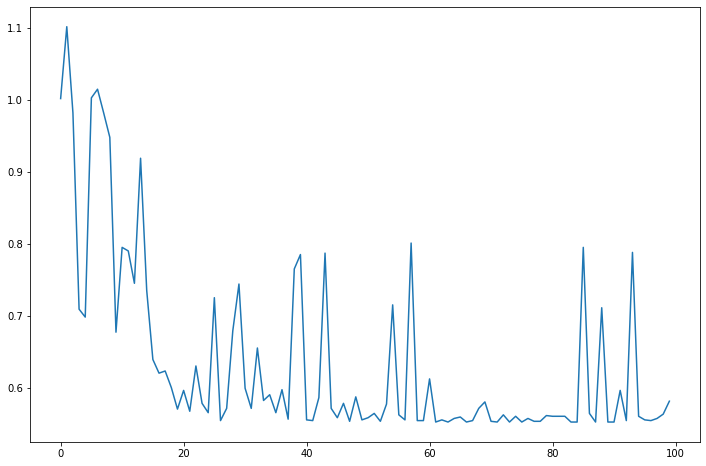

In [7]:
# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        df = pd.read_csv(path)
        self.X = df.values[:, 1:-1]
        self.y = df.values[:, -1]
        # ensure input data is floats
        self.X = self.X.astype('float32')
        # label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(self.y)
        
    # number of rows in the dataset
    def __len__(self):
        return len(self.X)
    
    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]
    
    # get indexes for train and test rows
    def get_splits(self, n_test=0.33):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        return random_split(self, [train_size, test_size])
 

# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 10)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        # second hidden layer
        self.hidden2 = Linear(10, 8)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        # third hidden layer and output
        self.hidden3 = Linear(8, 3)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Softmax(dim=1)
        
    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
        # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # output layer
        X = self.hidden3(X)
        X = self.act3(X)
        return X
    

# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl
 
# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    losses = []
    # enumerate epochs
    for epoch in range(100):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets.long())
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()
        print(f'epoch {epoch} - loss {loss.item():.3f} ')
        losses.append(np.round(loss.item(),3))
    return losses
            
# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        # convert to class labes
        yhat = np.argmax(yhat, axis=1)
        # reshape for stacking
        actual = actual.reshape((len(actual), 1))
        yhat = yhat.reshape((len(yhat), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = np.vstack(predictions), np.vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

# prepare the data
path = 'Iris.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))

# define the network
model = MLP(4)
# train the model
losses = train_model(train_dl, model)
# evaluate the model
acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)
# make a single prediction
row = [5.1,3.5,1.4,0.2]
yhat = predict(row, model)
print('Predicted: %s (class=%d)' % (yhat, np.argmax(yhat)))

plt.figure(figsize=(12,8))
plt.plot(np.array(losses))
plt.show()